### Write the python codes to build the clustering models on at least 4 datasets(using kmeans,kmediod,k-means++ and hierarchial) build the model with atleast 4 train_test_split combinations and different set of hyperparameter values. Perform the data preprocessing and performance evaluation for the model. 

In [64]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"]
datasets = [pd.read_csv(url, header=None) for url in urls]

# Select the columns to use for clustering
Xs = [dataset.iloc[:, :4].values for dataset in datasets]
split_ratios = [0.2, 0.3, 0.4, 0.5, 0.7]

# Preprocess the datasets
for i, dataset in enumerate(datasets):
    # Drop any columns that won't be used for clustering
    dataset.drop(dataset.columns[-1], axis=1, inplace=True)

# Train/test split and model fitting
results = []
for i, dataset in enumerate(datasets):
    for split_ratio in split_ratios:
        # Split the dataset into training and testing subsets
        X_train, X_test = train_test_split(dataset, test_size=split_ratio, random_state=42)

        # Fit the KMeans model
        kmeans = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_train)
        kmeans_labels = kmeans.predict(X_test)
        kmeans_score = silhouette_score(X_test, kmeans_labels)
        
        # Fit the KMedoids model
        kmedoids = KMedoids(n_clusters=4, random_state=42).fit(X_train)
        kmedoids_labels = kmedoids.predict(X_test)
        kmedoids_score = silhouette_score(X_test, kmedoids_labels)

        # Fit the KMeans++ model
        kmeanspp = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10).fit(X_train)
        kmeanspp_labels = kmeanspp.predict(X_test)
        kmeanspp_score = silhouette_score(X_test, kmeanspp_labels)
        
        # Fit the Agglomerative Clustering model
        agg = AgglomerativeClustering(n_clusters=4).fit(X_train)
        agg_labels = agg.fit_predict(X_test)
        agg_score = silhouette_score(X_test, agg_labels)

        result = {
            'dataset': i+1,
            'split_ratio': split_ratio,
            'kmeans_score': kmeans_score,
            'kmedoids_score': kmedoids_score,
            'kmeanspp_score': kmeanspp_score,
            'agg_score': agg_score
        }
        results.append(result)

# Convert the results to a Pandas dataframe and save as a CSV file
df = pd.DataFrame(results)
df.to_csv('cluster_scores.csv', index=False)
df.head()

,dataset,split_ratio,kmeans_score,kmedoids_score,kmeanspp_score,agg_score
0,1,0.2,0.405668,0.443889,0.405668,0.570459
1,1,0.3,0.463707,0.506150,0.463707,0.561849
2,1,0.4,0.509028,0.368609,0.509028,0.517608
3,1,0.5,0.509326,0.508266,0.509326,0.534238
4,1,0.7,0.506827,0.442693,0.506827,0.510163


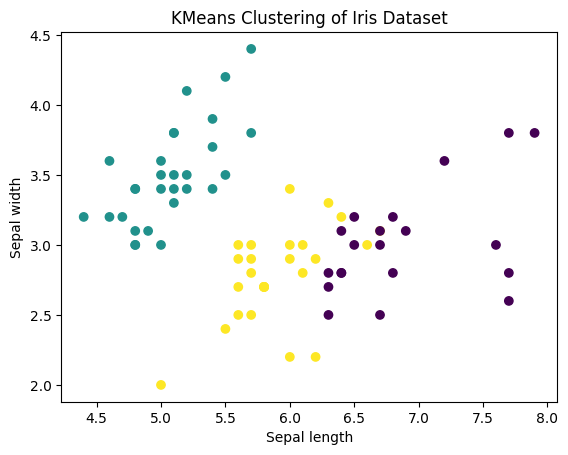

In [59]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header=None)

# Drop any columns that won't be used for clustering
dataset.drop(dataset.columns[-1], axis=1, inplace=True)

# Split the dataset into training and testing subsets
X_train, X_test = train_test_split(dataset, test_size=0.5, random_state=42)

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_train)
kmeans_labels = kmeans.predict(X_test)

# Plot the clusters
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_labels)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("KMeans Clustering of Iris Dataset")
plt.show()

kmedoids = KMedoids(n_clusters=4, random_state=42).fit(X_train)
kmedoids_labels = kmedoids.predict(X_test)